## Backpropagation

As an error-based supervised learning technique, the use of Feedforward Neural Networks is dependent on us having a means of estimating how well our model performs on individual training examples, and having a mechanism to update the parameters of the model based on the estimation of that performance. In this section we cover how this is done for the Neural Network.

For linear and logistic regression we calculated the change to be made to model parameters directly using the partial derivative of the model's error surface with respect to each individual parameter. For neural networks the approach of calculating the partial derivatives for all parameters in parallel will not work due to the layered nature of the network. 

Instead of depending on these parallel weight adjustments, the backpropagation algorithm gives us a way to estimate the error derivatives for nodes found in hidden layers by taking the error derivatives in subsequent layers and redistributing that derivative amongst all nodes that lead into a given node in a way that is dependent on the strength of weights. 

<!-- backporop.png --> 
<img width="300" src="https://drive.google.com/uc?id=1YcAuD45AN_LhgywKiYrcLdgjBQAJ38Ze"/>


To illustrate consider the simple constellation of neurons above where superscript refers to layer number, subscript refers to individual units within a layer and $\delta$ denotes the error derivative for a given unit. Assuming we have computed error derivative $\delta^{2}_{1}$ successfully, we will use that error derivative along with the weights from layer 1 to layer 2 and the activation values for layer 1 to estimate an error derivative for each neuron in layer 1. In vectorized notation this is: 

\begin{equation}
\delta^{l} = (\theta^{l})^{T}\; \delta^{l+1} .\times g'(z^{l}) 
\end{equation}

where $g'(z^{l})$ is the partial derivative of the $L^{th}$ layer's activation function and is given by: 

\begin{equation}
g'(z^{l}) = a^{l} \; (1-a^{l})
\end{equation}

We can use this method to calculate error derivatives for each of the hidden layers. We do not do this for the input layer as there is by definition no error in the input layer as the activation values from the input layer are taken directly from our input vector $x$ which should not change. Note that $.\times$ is used here to denote the array multiplication operation, i.e. the element wise multiplication of two matrices where either both matrices have the same size or one matrix is a scalar. This is very different to the matrix multiplication operator. 

The backpropagation algorithm involves the recursive application of $\delta$ from the output layer through each of the hidden layers. 

For the output layer there is no succeeding layer on which we can base a recursive calculation of $\delta$. Instead for the output layer we calculate the error derivatives $\delta$ directly using a non-recursive definition that includes the difference between activation values and target values for the output layer. This separate calculation of $\delta$ is given below:

\begin{equation}
\delta = (a-y) .\times g'(z^{l}) 
\end{equation}

or given the definition of $g'(z^{l})$ established above: 

\begin{equation}
\delta = (a-y) \; (a \; (1-a)) 
\end{equation}

The backpropagated value for $\delta$ establishes the gradient of the error associated with each hidden unit in the network, but this value in itself does not say anything about the changes which we should make to our parameters $\theta$ to improve classification. Changes to our parameter weights are calculated with a separate equation that makes use of the calculated values for $\delta$ along with activation values. Specifically the changes to be made to individual weights are given in a vectorized form below: 

\begin{equation}
  \Delta^{l-1} = \delta \; a^{l-1}_{i}  
\end{equation}

where $\Delta$ is defined as the partial derivative of error with respect to individual weights. 

As with linear and logistic regression we accumulate errors over a number of different training examples. We denote the total updates for node j in layer l by $\Delta_{ij}^{l}$. 

## The Backpropagation Algorithm 

The Backpropagation Algorithm itself involves the systematic calculation of $\delta$ and $\Delta$ across layers starting with the output layers. 

Given

> A set of training data $ Data_{Training} = \{ (x^{0},y^{0}),(x^{1},y^{1}),(x^{2},y^{2})\dots (x^{m-1},y^{m-1}) \}$

> A network with weights randomly initialized between -1 and 1 

For each instance i in the training data:

> Forward Propagate $x[i]$ through the network 

> Backpropagate Error Derivatives back through the network

> > Calculate error derivative for final layer using $\delta = (a-y) \; (a (1-a))$ for $y[i]$

> > Calculate error derivative for hidden layers using $ \delta^{l} = \sum_{j} ( \delta^{l+1} \; \theta^{l}_{i} ) \; g'(z^{l})$

> > For each hidden layer accrue weight updates $\Delta_{ij}^{(l)} = \Delta_{ij}^{(l)} + a_{j}^{(l)}\delta_{i}^{(l+1)} $

> Update weights with accrued weight changes $\theta = \theta + \Delta$

The implementation of this algorithm is relatively straightforward, but there are some important points to keep in mind. We do not in practice calculate errors for bias units. The reason for this is that the error in a bias unit is not back-propagated to previous layers since bias units do not have weights leading into them. However the weights leading out from bias units do have calculated errors. These errors are calculated on the basis of the activation of the bias unit on the errors on nodes in the $i+1^{th}$ layer. 


## Going Deep -- Deriving the Backpropagation Equations

In the notes above we simply stated the equations that are used to implement backpropagation. Based on these equations it is possible to implement backpropagation correctly, but it is useful to understand the derivation of these equations -- particularly since the derivations are straightforward. In the following we outline those derivations. 

### Error
The goal of the Backpropagation Algorithm is to find an adjustment to each weight in the network to reduce total error. 

We can calculate the total error for a single training example for a single output neuron of the network using the sum of squared error function: 

\begin{equation*}
   E = \frac{1}{2} (y - a)^{2}
\end{equation*}

where $a$ is the actual activation values for an output unit and $y$ is the expected values of the unit for a training case. Note that our usual sum over training cases $\sum$ is missing because for notational clarity we are dealing with the result for a single training case rather than the set of training cases. 

### Calculating Error Gradients for the Output Units 

Our goal in training a neuron is to determine the changes we can make to individual weights leading into the neuron in order to reduce this error. To determine the best changes to make to the weights we calculate the partial derivative of the error with respect to individual input weights. 

\begin{equation}
\frac{\partial E}{\partial \theta_{i}}
\end{equation}

where $i$ is the $i^{th}$ input to the neuron (including a bias input). While this notation is common, it does not take account of the layered structure of the network. The weights $\theta_{i}$ actually technically belong not to the layer which we are calculating the error derivative for, $l$, but to the proceeding layer $l-1$. Therefore we can more correctly write the above as:

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}}
\end{equation}

This figure is the gradient of the error surface for a given weight. Knowing it we can adjust our weights to try to minimize the error. However this figure is difficult to compute directly. To compute it we rely on the chain rule in order to calculate this figure in terms of a number of components: 

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}} = \frac{\partial E}{\partial a}  \frac{\partial a}{\partial z}  \frac{\partial z}{\partial \theta^{l-1}_{i}}
\end{equation}

The first of these three components can be derived directly using the power rule. 

\begin{align*}
                             E &= \frac{1}{2} (y - a)^{2}\\
 \frac{\partial E}{\partial a} &= 2 (\frac{1}{2}) (y-a)^{1} (-a^{0})\\
                               &= (y-a) (-1)\\
                               &= a-y
\end{align*}

The second of these $\frac{\partial a}{\partial z}$ is referred to in some sets of notes as $g'(z)$ since it is the derivative of the logistic function. This partial derivative is mathematically more tough than the component above and is dependent on the known derivative of the logistic function $a = \frac{1}{1+e^{-z}}$. This partial derivative is: 

\begin{equation}
 \frac{\partial a}{\partial z} = a (1-a) 
\end{equation}

The third component $\frac{\partial z}{\partial \theta^{l-1}_{i}}$ can be calculated relatively straightforwardly from the definition of $z$. (In the notation below we introduce superscripts to denote layers.)

\begin{align*}
   z^{l} &= \sum_{i=1}^{N} ( \theta^{l-1}_{i} a^{l-1}_{i} ) + b^{l-1} * 1\\
  \frac{\partial z}{\partial \theta^{l-1}_{i}} &= (\theta^{l-1}_{i})^{0} * a^{l-1}_{i}\\
                                         &= 1 * a^{l-1}_{i}\\
                                         &= a^{l-1}_{i}
\end{align*}

Combining these three factors gives us an equation for the gradient of the error with respect to an individual input weight:

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}} = (a-y) \; (a (1-a)) \; a^{l-1}_{i}
\end{equation}

This is the basic form of the **delta rule**. The delta rule defines the error with respect to individual weights but simultaneously defines the changes we need to make to the weight in order to reduce the error. If the derivative is low we are close to an error minimum and thus make a small change to the weights. If the derivative is much higher we are far away from a minimum and thus must make a much larger change to the weights. 

Rather than writing $\frac{\partial E}{\partial \theta^{l-1}_{i}} $ for the derivative of the error with respect to weights we often write an upper case delta $\Delta$. Similarly by convention we often write $ \frac{\partial E}{\partial z} = \frac{\partial E}{\partial a}  \frac{\partial a}{\partial z}$, the derivative of the Error with respect to the input of a unit, simply as a lower case delta $\delta$. These notational conventions are summarized below:

\begin{align*}
  \Delta^{l-1} &= \frac{\partial E}{\partial \theta^{l-1}_{i}} \\
  \Delta^{l-1} &= \frac{\partial E}{\partial a}  \frac{\partial a}{\partial z}  \frac{\partial z}{\partial \theta^{l-1}_{i}} \\
  \Delta^{l-1} &= (a-y) \; (a (1-a)) \; a^{l-1}_{i}  \\
  \delta &= \frac{\partial E}{\partial z} \\
  \delta &= \frac{\partial E}{\partial a}  \frac{\partial a}{\partial z} \\
  \delta &= (a-y) \; (a (1-a)) 
\end{align*}

Therefore

\begin{equation}
  \Delta^{l-1} = \delta \; a^{l-1}_{i}  
\end{equation}

or 

\begin{equation}
  \Delta = \delta^{l+1} \; a_{i}  
\end{equation}

### Calculating Error Gradients for Hidden Layer Units 

Note that $\Delta$ is dependent on the activation values of the nodes connected by a given weight and on the target value for the node in the second layer. The target value for the second layer node when that second layer is the output layer is given directly to us. But when that second node is in a hidden layer we can't directly say what the target value should be for a hidden node. 

For nodes in the hidden layers we get around this problem by calculating $\frac{\partial E}{\partial a}$ in a different way.  Instead we use the principle of backpropagation to take the error derivative in a node in a later layer and pass the blame back to nodes in the preceeding layer in a way that is proportional to the weights connecting the layers. This idea of propagating the error backwards is directly analogous to the propagation of activation forwards through the network. While many sets of notes describe this as the backpropagation of the error, it is important to understand that we are in fact backpropagating $\delta$, i.e., the derivative of the error with respect to logit values. 

Breaking this down, the partial derivative of the total Error with respect to the activation of a neuron in the $l-1^{th}$ row is equal to the sum of partial derivative of errors on neurons in the $l^{th}$ row with respect to the activation of the neuron in the $l-1^{th}$ row, i.e.,: 

\begin{equation}
    \frac{\partial E^{l-1}}{\partial a^{l-1}} = \sum_{j}  \frac{\partial E_{j}^{l}}{\partial a^{l-1}} 
\end{equation}

The partial derivative of the error in a row $l$ neuron with respect to the activation of a row $l-1$ neuron can be broken down as follows: 

\begin{equation}
 \frac{\partial E^{l}}{\partial a^{l-1}} =  \frac{\partial E^{l}}{\partial a^{l}} \frac{\partial a^{l}}{\partial z^{l}}  \frac{\partial z^{l}}{\partial a^{l-1}}
\end{equation}

The first two components of this equation have been seen before above. They are:

\begin{align*}                   
 \frac{\partial E^{l}}{\partial a^{l}} &= a^{l}-y^{l} \\
 \frac{\partial a^{l}}{\partial z^{l}}  &= a^{l} (1-a^{l}) 
\end{align*}

The third component $\frac{\partial z^{l}}{\partial a^{l-1}}$ can be calculated in an analogous way to how we calculated $\frac{\partial z}{\partial \theta^{l-1}_{i}}$ previously, i.e., 

\begin{align*}
   z^{l} &= \sum_{i=1}^{N} ( \theta^{l-1}_{i} a^{l-1}_{i} ) + b^{l-1} * 1\\
  \frac{\partial z^{l}}{\partial a^{l-1}} &= \theta^{l-1}_{i} * (a^{l-1}_{i})^{0}\\
                                      &= \theta^{l-1}_{i} * 1\\
                                      &= \theta^{l-1}_{i}
\end{align*}

Plugging these components back in to our definition of $\frac{\partial E^{l}}{\partial a^{l-1}}$ we have:

\begin{equation}
 \frac{\partial E^{l}}{\partial a^{l-1}} = (a^{l}-y^{l}) \;  a^{l} (1-a^{l}) \; \theta^{l-1}_{i}
\end{equation}

or 

\begin{equation}
 \frac{\partial E^{l}}{\partial a^{l-1}} = \delta^{l} \; \theta^{l-1}_{i}
\end{equation}

since we previously established $\delta^{l} = (a^{l}-y^{l}) \;  a^{l} (1-a^{l}) $. 

Plugging this into our definition of $\frac{\partial E^{l-1}}{\partial a^{l-1}}$ we have:

\begin{equation}
    \frac{\partial E^{l-1}}{\partial a^{l-1}} = \sum_{j} \delta^{l} \; \theta^{l-1}_{i}
\end{equation}

which in turn can be plugged in to our $l-1$ definition of the $\Delta$ rule equation:

\begin{equation}
\frac{\partial E^{l-1}}{\partial \theta^{l-2}_{i}} = \frac{\partial E^{l-1}}{\partial a^{l-1}}  \frac{\partial a^{l-1}}{\partial z^{l-1}}  \frac{\partial z^{l-1}}{\partial \theta^{l-2}_{i}}
\end{equation}

to give

\begin{equation}
\frac{\partial E^{l-1}}{\partial \theta^{l-2}_{i}} =  \sum_{j} ( \delta^{l} \; \theta^{l-1}_{i} )  \frac{\partial a^{l-1}}{\partial z^{l-1}}  \frac{\partial z^{l-1}}{\partial \theta^{l-2}_{i}}
\end{equation}

But 
\begin{equation}
  \delta^{l-1} = \frac{\partial E^{l-1}}{\partial a^{l-1}}  \frac{\partial a^{l-1}}{\partial z^{l-1}} 
\end{equation}

Therefore, we have a recursive definition of $\delta$:

\begin{equation}
  \delta^{l-1} = \sum_{j} ( \delta^{l} \; \theta^{l-1}_{i} ) \frac{\partial a^{l-1}}{\partial z^{l-1}} 
\end{equation}

or 

\begin{equation}
  \delta^{l-1} = \sum_{j} ( \delta^{l} \; \theta^{l-1}_{i} ) \; g'(z^{l-1}) 
\end{equation}

Expressing this in terms of the $l^{th}$ layer we have:

\begin{equation}
  \delta^{l} = \sum_{j} ( \delta^{l+1} \; \theta^{l}_{i} ) \; g'(z^{l}) 
\end{equation}

i.e., $\delta$ or $\frac{\partial E}{\partial z}$ in a given layer $l-1$ is defined in terms of the values of $\delta$ for layer $l$. This is important as it allows us to define $\delta$ and in turn $\Delta$ in hidden layers without needing to know exactly what expected value a unit should have. 


## Implementing Backprop

In [ ]:
# In this implementation we force all vectors to be true 2D arrays with 1 column rather than
# numpy 1D arrays. This makes it easier to use matirx operations. 

class Backpropogation: 
    
    def __init__(self,x,y,s):
        # set class references to X and Y
        self.X = x
        self.Y = y
        self.S = s
        # Define empty arrays for activation
        self.a     =  [None] * len(self.S)
        # Define empty array for z values (i.e., inputs) 
        self.z     =  [None] * len(self.S)
        # Define empty arrays for weights
        self.theta =  [None] * len(self.S)
        # Define empty array for error derivitives for indivual units
        self.delta =  [None] * len(self.S)
        # Define empty arrays for accumulated errors on weights
        self.Delta =  [None] * len(self.S)

        # Randomly Initialize the weights for all layers
        for idx, val in enumerate(self.S):
            if idx == (len(self.S)-1): # ouput layer has no weights
                break
            self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1])

    # calculate the squared error given a list of actual values and a list of target values
    def sqError(self,a,y):
        return np.sum(np.multiply(0.5,(a-y)**2))

    def forwardProp(self,x): 
        # Forward propogate activation 
        # For each layer from input to output
        for idx, val in enumerate(self.S):
            if idx == 0:
                # construct the activation values for the input layer from X and a bias value
                self.a[idx] = np.atleast_2d(np.hstack(([1.0],x))).T
            elif idx == (len(self.S)-1):
                # calculate z for the output layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate a for the output layer∂E/∂zⱼ * ∂zⱼ/∂wᵢ
                self.a[idx] = 1 / (1 + np.exp(-self.z[idx]))
            else:
                # calculate z for a hidden layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate a for a hidden layer
                self.a[idx] = np.vstack(([1.0],1 / (1 + np.exp(-self.z[idx]))))
        # return the actual output values for the output layer 
        return self.a[len(self.S)-1]
    
    def predict(self,X):
        results = []
        for datum in X:
            results.append(self.forwardProp(datum))
        return np.squeeze(results)
            
    def backwardProp(self,y):
        # For each layer from output to input 
        for idx, val in reversed(list(enumerate(self.S))): 
            if idx == (len(self.S)-1):
                # calculate ∂a/∂z for the output layer  
                gprimez = np.multiply(self.a[idx],(1 - self.a[idx]))
                # ∂E/∂zⱼ
                self.delta[idx] = np.multiply(self.a[idx] - y,gprimez)
            elif idx == 0:
                # we need to update the weights in the 0th layer but we don't propogate error
                # derivitive back to the input units. 
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T
            else:
                # calculate the error for all other layers

                # 1. calculate the derivitive of a with respect to z
                gprimez = np.multiply(self.a[idx],(1 - self.a[idx]))

                # 2. calculate the error associatd with each node in the current layer. 
                self.delta[idx] = np.multiply(np.matmul(self.theta[idx],self.delta[idx+1]),gprimez)

                # get rid of the bias unit
                self.delta[idx] = self.delta[idx][1:,:]    

                # 3. update the accumulated change
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T

        return self.sqError(self.a[len(self.S)-1],y)

    def train(self,epochs):
        errors = []
        # For each training epoch 
        for k in range(epochs):
            error = 0
            # Initialize Delta for this epoch
            for idx, val in enumerate(self.S):
                if idx < (len(self.S)-1): # ouput layer has no weights
                    self.Delta[idx] = np.zeros((self.S[idx]+1,self.S[idx+1]))
            # Iterate over all training examples 
            for i, y in enumerate(self.Y):     
                self.forwardProp(self.X[i])
                error += self.backwardProp(y)
            errors.append(error)
            # For each layer from output to input 
            for idx, val in reversed(list(enumerate(self.S))): 
                if idx < (len(self.S)-1):
                    # Update the weights
                    self.theta[idx] = self.theta[idx] - (1/len(self.Y)) * self.Delta[idx] 
        return errors 
 
    def test(self): 
        for i, y in enumerate(self.Y):     
            output = self.forwardProp(self.X[i])
            print(self.X[i])
            print(output)
            print("---")

To test our neural network implementation we will begin with the simple example of a XNOR operation. This is a classic example in Neural Network training as it is one of the more basic operations that cannot be learned without hidden units. For XNOR we have 1 output variable and 2 input variables where all variables are binary. As a reminder from the last section, this is the truth table for the XNOR operation:

x1 | x2 | x1 XNOR x2
--- | --- | :---:
0 |	0 |	1
0 |	1 |	0
1 |	0 |	0
1 | 1 | 1

[0 0]
[[0.04609711]]
---
[0 1]
[[0.95845939]]
---
[1 0]
[[0.95830358]]
---
[1 1]
[[0.04444619]]
---


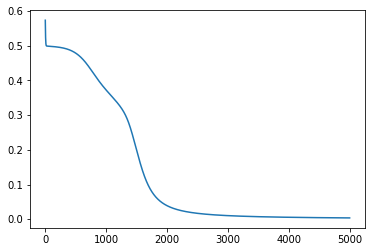

In [ ]:
# Define the training data
Y = np.array([  0,1,1,0])
X1 = np.array([ 0,0,1,1])
X2 = np.array([ 0,1,0,1])
X = np.vstack((X1,X2)).T

# Define the number of (visible) units in each layer 
s = [2,2,1]    
    
# Instantiate the network with data and topology, before running training and printing results
bp = Backpropogation(X,Y,s)
errors = bp.train(5000)
bp.test()

# Visualize Error over Epochs 
plt.plot(errors)
plt.show()

For a second example we will look again at the non-linear logistic regression example that we previously considered. In this case the positive examples are clustered together and negative examples form a ring around that cluster as illustrated below. 

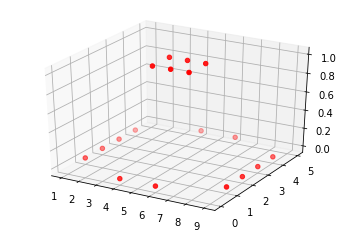

In [ ]:
# Define the training data
Y = np.array([ 0,0,0,0,0,       1,1,1,  0,0,    1,1,1,     0,0,0,0,0])
X1 = np.array([4,6,1,9,1,       4,5,6,  9,1,    4,5,6,     9,1,9,4,6])
X2 = np.array([0,0,1,1,2,       2,2,2,  2,3,    3,3,3,     3,4,4,5,5])
X = np.vstack((X1,X2)).T

# standardize our input features
X, means, stds = standardize(X)

# Plot the training data in our usual way where the Target variable occupies the z-axis 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, c='r', marker='o')
plt.show()

Given this data we can define and train a classification with two hidden layers that can learn the appropriate non-linear decision boundary. 

[-0.36380344 -1.75561721]
[[0.00372458]]
---
[ 0.36380344 -1.75561721]
[[0.13222765]]
---
[-1.45521375 -1.05337032]
[[0.00276338]]
---
[ 1.45521375 -1.05337032]
[[0.14578838]]
---
[-1.45521375 -0.35112344]
[[0.0027985]]
---
[-0.36380344 -0.35112344]
[[0.82722397]]
---
[ 0.         -0.35112344]
[[0.99299459]]
---
[ 0.36380344 -0.35112344]
[[0.99224777]]
---
[ 1.45521375 -0.35112344]
[[0.00447011]]
---
[-1.45521375  0.35112344]
[[0.00438222]]
---
[-0.36380344  0.35112344]
[[0.99383031]]
---
[0.         0.35112344]
[[0.98958942]]
---
[0.36380344 0.35112344]
[[0.76804266]]
---
[1.45521375 0.35112344]
[[0.00231752]]
---
[-1.45521375  1.05337032]
[[0.12027538]]
---
[1.45521375 1.05337032]
[[0.00199562]]
---
[-0.36380344  1.75561721]
[[0.15578825]]
---
[0.36380344 1.75561721]
[[0.00268841]]
---


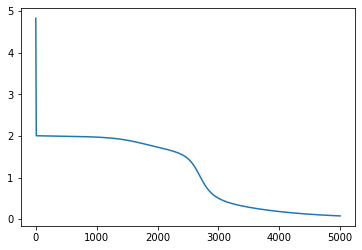

In [ ]:
# Define the number of (visible) units in each layer 
s = [2,8,8,1]    
    
# Instantiate the network with data and topology, before running training 
bp = Backpropogation(X,Y,s)
errors = bp.train(5000)
bp.test()

# Visualize Error over Epochs 
plt.plot(errors)
plt.show()

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def standardize(x):
    col_means = np.mean(x,axis=0)
    col_std = np.std(x,axis=0)
    return (x - col_means) / col_std , col_means, col_std

## Cross Entropy Loss Function 

### Motivation
In our derivation and explanation of the basic Backpropagation algorithm we made use of the mean squared error (MSE) loss function. Specifically we made use of the MSE to calculate the final error after training, but more importantly we also made use of the derivative of the MSE in determining our equations for propagating error from the output layer to the penultimate layer of the network. 

To be more precise we calculated the derivative of the error E with respect to the input weights $\theta^{l-1}_{i}$ with the chain rule as follows:

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}} = \frac{\partial E}{\partial a}  \frac{\partial a}{\partial z}  \frac{\partial z}{\partial \theta^{l-1}_{i}}
\end{equation}

or

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}} = (a-y) \; (a (1-a)) \; a^{l-1}_{i}
\end{equation}

Unfortunately this equation is dependent on the partial derivative of $a$ with respect to $z$ which is given by $a\;(1-a)$. This term, the slope of the logistic activation function, introduces some problems for us and if we plot it we get an intuition of why this is the case. 

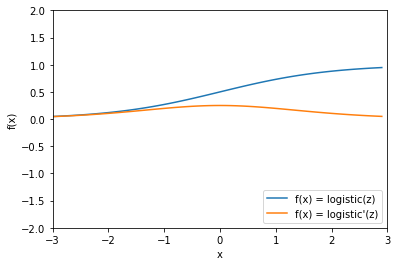

In [ ]:
x1 = np.arange(-3,3,0.1)
x0 = np.array([1]*len(x1))
x = np.vstack((x0,x1))
z1 = np.matmul(np.array([0,1]),x)
a = (1 / (1 + np.exp(-z1)))

plt.plot(x1, a) 
plt.plot(x1,np.multiply(a,(1 - a)))
plt.xlim([-3,3])
plt.ylim([-2,2])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend(['f(x) = logistic(z)','f(x) = logistic\'(z)'], loc='lower right')
plt.show()

Unfortunately the logistic function has a derivative close to 0 both where the activation is close to 0 and close to 1. This is fine when the our target say is 0 and our activation is almost 0 but can equally happen when our target is 0 and our activation is hovering close to 1. The consequence of this is that our learning rate is slow when our activations are very wrong with respect to what they should be. 

What we need to do is somehow remove $\frac{\partial E}{\partial \theta^{l-1}_{i}}$'s reliance on the partial derivative of the logistic activation function with respect to the logit. Unfortunately given our error and activation model there is nothing we can do to fix this.

### The Cross Entropy Loss Function

To overcome our problem and remove $\frac{\partial E}{\partial \theta^{l-1}_{i}}$'s dependence on the slope of the logistic function, we will introduce a new cost function. The new cost function will result in a new equation for $\frac{\partial E}{\partial a}$ which will in turn help to cancel out our reliance on the derivative of the logistic activation function.  

For this we will replace the MSE cost function with the Cross-Entropy Cost Function which is given below expressed in terms of a single activation value $a$ and target output $y$:

\begin{equation}
 cost_{CELF}(a,y) = - y \; log(a) - (1-y) log (1 - a) 
\end{equation}

or 

\begin{equation}
 cost_{CELF}(a,y) = - \big( y \; log(a) + (1-y) log (1 - a) \big)
\end{equation}

This is essentially the same error function that we used for logistic regression. This function works for binary targets where we know that predictions are bounded between 0 and 1. Cases where the target is close to the correct value incur a very small error whereas cases where the target is very wrong incur extremely large errors. Please see notes on logistic regression for more details. 

Importantly for our purposes here we can calculate the partial derivative of this error function with respect to the activation values. We can start by noting that the partial derivative of the cost with respect to the activation $\frac{\partial E}{\partial a}$ is simply:

\begin{equation}
 \frac{\partial E}{\partial a} = \frac{y}{a} - \frac{1-y}{1-a}
\end{equation}

which we can rework over a common denominator: 

\begin{equation}
 \frac{\partial E}{\partial a} = \frac{y(1-a) - (1-y)a}{a(1-a)}
\end{equation}

Multiplying out the top gives us:

\begin{equation}
 \frac{\partial E}{\partial a} = \frac{y - ya - a + ya} {a(1-a)}
\end{equation}

which is of course:

\begin{equation}
 \frac{\partial E}{\partial a} = \frac{y -a} {a(1-a)}
\end{equation}

We can substitute this into our equation for $\frac{\partial E}{\partial \theta^{l-1}_{i}}$ as follows:

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}} = \frac{y -a} {a(1-a)} \; (a (1-a)) \; a^{l-1}_{i}
\end{equation}

Allowing us to cancel out the $a(1-a)$ terms to give us:

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}} = (y -a) \; a^{l-1}_{i}
\end{equation}

This is a very simplified expression in comparison to our original MSE equivalent. We now have that the gradient of the error surface in the output layer with respect to activations in the penultimate layer is simply given by the equation $(y -a) \; a^{l-1}_{i}$. Note that our reliance on the derivative of the logistic function with respect to z is now gone and thus so is our problem where training can slow down when our predictions are very wrong. 

For our hidden layers we can apply the same logic to the derivation of 

\begin{equation}
 \frac{\partial E^{l}}{\partial a^{l-1}} = \delta^{l} \; \theta^{l-1}_{i}
\end{equation}

where $\delta = (y - a)$. 

However the rest of our derivation of the recursive delta rule does not change resulting in a final delta update rule of:

\begin{equation}
  \delta^{l} = \sum_{j} ( \delta^{l+1} \; \theta^{l}_{i} ) \; g'(z^{l}) 
\end{equation}

which includes a $g'(z^{l})$ term, i.e., $a(1-a)$. It should be noted however that while we still have one instance of the gradient of a logit, this is still an improvement on our original MSE based equations. 

We can demonstrate the use of the Cross Entropy Loss function along with its derivative by reworking our Backpropagation implementation to support Cross Entropy Loss function in addition to the Mean Square Error loss that was previously used. 

In [ ]:
# In this implementation we force all vectors to be true 2D arrays with 1 column rather than
# numpy 1D arrays. This makes it easier to use matirx operations. 

def celf_(y,a):
    if y == 1:
        return -np.log(a)
    elif y == 0:
        return -np.log(1-a)

celf = np.vectorize(celf_)
    
class Backpropogation: 
    
    def __init__(self,x,y,s,cost="mse"):
        # set class references to X, Y, S and the activation function
        self.X = x
        self.Y = y
        self.S = s
        self.cost = cost
        # Define empty arrays for activation
        self.a     =  [None] * len(self.S)
        # Define empty array for z values (i.e., inputs) 
        self.z     =  [None] * len(self.S)
        # Define empty arrays for weights
        self.theta =  [None] * len(self.S)
        # Define empty array for error derivitives for indivual units
        self.delta =  [None] * len(self.S)
        # Define empty arrays for accumulated errors on weights
        self.Delta =  [None] * len(self.S)

        # Initialize the weights for all layers
        for idx, val in enumerate(self.S):
            if idx == (len(self.S)-1): # ouput layer has no weights
                break
            self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1])

    # Calculate the cost
    def calcCost(self,a,y):
        if self.cost == "mse":
            return np.sum(np.multiply(0.5,(a-y)**2))
        elif self.cost == "celf":
            return np.sum(celf(y,a))
        else: print("Error - no cost function selected")
    
    # calculate the activation values given an input
    def calcActivation(self,z):
        return 1 / (1 + np.exp(-z))
        
    # calculate ∂a/∂z
    def calcGPrimeZ(self,a):
        return np.multiply(a,(1 - a))

    def forwardProp(self,x): 
        # Forward propogate activation 
        # For each layer from input to output
        for idx, val in enumerate(self.S):
            if idx == 0:
                # construct the activation values for the input layer from X and a bias value
                self.a[idx] = np.atleast_2d(np.hstack(([1.0],x))).T
            elif idx == (len(self.S)-1):
                # calculate z for the output layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate the activation values
                self.a[idx] = self.calcActivation(self.z[idx]) 
            else:
                # calculate z for a hidden layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate a for a hidden layer
                self.a[idx] = np.vstack(([1.0],self.calcActivation(self.z[idx])))
        # return the actual output values for the output layer 
        return self.a[len(self.S)-1]
    
    def predict(self,X):
        results = []
        for datum in X:
            results.append(self.forwardProp(datum))
        return np.squeeze(results)
            
    def backwardProp(self,y):
        # For each layer from output to input 
        for idx, val in reversed(list(enumerate(self.S))): 
            if idx == (len(self.S)-1):
                if self.cost == "mse":                  
                    # calculate ∂a/∂z for the output layer 
                    gprimez = self.calcGPrimeZ(self.a[idx])

                    # ∂E/∂zⱼ
                    self.delta[idx] = np.multiply(self.a[idx] - np.atleast_2d(y).T,gprimez)
                elif self.cost == "celf":
                    # ∂E/∂zⱼ
                    self.delta[idx] = -(np.atleast_2d(y).T - self.a[idx])
                else: print("Error - no cost function selected")                 
            elif idx == 0:
                # we need to update the weights in the 0th layer but we don't propogate error
                # derivitive back to the input units. 
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T                
            else:
                # calculate the error for all other layers

                # 1. calculate the derivitive of g(z)
                gprimez = self.calcGPrimeZ(self.a[idx])

                # 2. calculate the error associatd with each node in the current layer. 
                self.delta[idx] = np.multiply(np.matmul(self.theta[idx],self.delta[idx+1]),gprimez)
                
                # get rid of the bias unit
                self.delta[idx] = self.delta[idx][1:,:]    

                # 3. update the accumulated change
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T

        return self.calcCost(self.a[len(self.S)-1],np.atleast_2d(y).T)

    def train(self,epochs):
        errors = []
        # For each training epoch 
        for k in range(epochs):
            error = 0
            # Initialize Delta for this epoch
            for idx, val in enumerate(self.S):
                if idx < (len(self.S)-1): # ouput layer has no weights
                    self.Delta[idx] = np.zeros((self.S[idx]+1,self.S[idx+1]))
            # Iterate over all training examples 
            for i, y in enumerate(self.Y):     
                self.forwardProp(self.X[i])
                error += self.backwardProp(y)
            errors.append(error)
            # For each layer from output to input 
            for idx, val in reversed(list(enumerate(self.S))): 
                if idx < (len(self.S)-1):
                    # Update the weights
                    self.theta[idx] = self.theta[idx] - (1/len(self.Y)) * self.Delta[idx] 
        return errors 

    def test(self): 
        for i, y in enumerate(self.Y):     
            output = self.forwardProp(self.X[i])
            print(self.X[i])
            print(y)
            print(output)
            print("Error is " + str(self.calcCost(output,np.atleast_2d(y).T)))
            print("---")

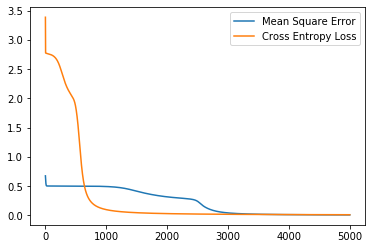

In [ ]:
# Define the training data
Y = np.array([  0,1,1,0])
X1 = np.array([ 0,0,1,1])
X2 = np.array([ 0,1,0,1])
X = np.vstack((X1,X2)).T

# Define the number of (visible) units in each layer 
s = [2,2,1]    
    
# Instantiate the network with data and topology, before running training and printing results
bp = Backpropogation(X,Y,s,cost="mse")
errors = bp.train(5000)

# Visualize Error over Epochs 
plt.plot(errors)

# Instantiate the network with data and topology, before running training and printing results
bp = Backpropogation(X,Y,s,cost="celf")
errors = bp.train(5000)

# Visualize Error over Epochs 
plt.plot(errors)
plt.legend(['Mean Square Error','Cross Entropy Loss'], loc='upper right')
plt.show()

It should be noted that in the above that the final error with CELF can be higher than that measured with MSE. This does not mean that CELF is doing worse that MSE. CELF and MSE have different values for the same target and activation values. This is easily shown by calculating the MSE and CELF for the same target and activation vectors. 

In [ ]:
Y = np.array([0,0,1,1])
A = np.array([0.1,0.9,0.1,0.9])

s = np.sum(celf(Y,A))
print("CELF error for the target and activation vectors was " + str(s))

s = np.sum(np.multiply(0.5,(A-Y)**2))
print("MSE error for the same vectors was " + str(s))

CELF error for the target and activation vectors was 4.815891217303744
MSE error for the same vectors was 0.8200000000000001


What is important to note in the example above is that the error with CELF reduced quite quickly in terms of the number of epochs which the training based on MSE took many more epochs. 

## Multivariate Outputs in Network
The examples we have considered to this point have only binary target variable. In practice we can easily extend our basic architecture to handle a categorial target variable by using a 1-of-k encoding which results in multiple binary output units. In a case of a true categorical target variable only one of these output nodes should be active for a given input. 

### Multi-Logistic Outputs
We can implement one approach to multivariate outputs by simply extending our implementation above to have multiple output neurons rather than a single output neuron. We demonstrate this with the simple set of multivariate outputs that we previously used in the notes for logistic regression. 

Time taken: 5.276141398


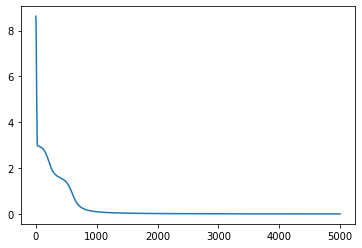

In [ ]:
# Define the data - r for red, g for green, and b for blue
Ys = ['b','b','r','b','g','r','g','r','g']
Yr = [1 if a =='r' else 0 for a in Ys]
Yg = [1 if a =='g' else 0 for a in Ys]
Yb = [1 if a =='b' else 0 for a in Ys]
X1 = [1,1,4,2,2,3,1,4,2]
X2 = [1,2,4,2,3,3,4,2,4]
X = np.vstack((X1,X2)).T
Y = np.vstack((Yr,Yg,Yb)).T

# standardize our input features
X, means, stds = standardize(X)

# Define the number of (visible) units in each layer 
# note that our output layer now has 3 units 
s = [2,8,8,3]    

start = time.perf_counter()    
# Instantiate the network with data and topology, before running training 
bp = Backpropogation(X,Y,s,["logistic","logistic","logistic"])
errors = bp.train(5000)
print("Time taken: " + str(time.perf_counter() - start))

# Visualize Error over Epochs 
fig = plt.figure()
plt.plot(errors)
plt.show()

As we can see the results are good as the network allows features to be built in the early layers that are of benefit to to our 3 binary classifiers in the final layer. 

However if we examine the results a little further we can see that the output of the 3 units does not generally sum to 1. In this case it sums to something very close to 1 due to the fact that we use our training data for testing but in normal cases there can be quite a lot of variation in output node values. For example in an image classification task with 100 different image classes we could end up several output units giving an activation anywhere in the range 0.2 - 1.0. The point here is that a number of units might give some reasonable probability of activation. 

### Softmax Activation Function

In the approach above, we can decide just to interpret the output node with the highest activation value as the winner, but in practice that is less than ideal. In the case of a true multivariate classification task the input should be classified as 1 and only 1 output class. We know that in this case the target values for all other classes should be 0. We can take advantage of this mutual exclusivity to engineer a better unit type for our output layer that makes sure that the unit with the highest activation value is labeled with a clean positive value, i.e. 1 and all other units activate to 0. 

One possible way to do this is by applying a max function to the outputs of our current final layer. The max function would by definition have a value of 1 for the highest activation and 0 for all other activations. 

We can illustrate this application of a max function as follows:

Note that the sum of the input vector is less than 1: -0.49


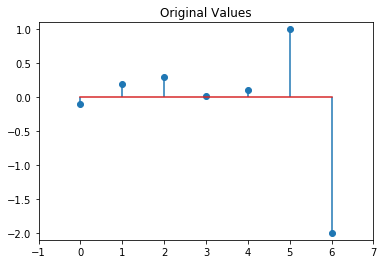

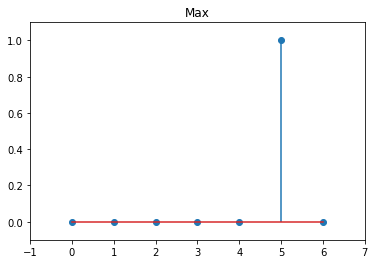

In [ ]:
x = np.array([-0.1,0.2,0.3,0.01,0.1,1,-2])
print("Note that the sum of the input vector is less than 1: " + str(np.sum(x)))

plt.ylim(-2.1,1.1)
plt.xlim(-1,7)
plt.title("Original Values")
plt.stem(x,use_line_collection=True)
plt.show()

def maxmask(x):
    a = np.zeros(shape=x.shape)
    a[np.argmax(x)] = 1
    return a

y = maxmask(x)
plt.ylim(-0.1,1.1)
plt.xlim(-1,7)
plt.title("Max")
plt.stem(y,use_line_collection=True)
plt.show()

A max function would simply map a range of input values into a range of 0 to 1 but with 1 and only 1 value set to 1, and with all the others set to 0. This would entail that the output unit with the largest value for the logit z would be mapped to an activation value of 1 while all other neurons would have an activation value of exactly 0. 

The max function itself is unsuited for our use for many reasons. The biggest problem is that the derivative of the max function is not suitable for use in the backprop algorithm. Related to that is the issue that outputs of exactly 0 or 1 are often problematic in many of the cost function calculations that we make (particularly for CELF). 

#### Softmax function 

Instead of using the max function we will instead adopt an activation function that produces a result very close to the max function but which has a well defined derivative. This softmax function maps our logit values into the range of 0 to 1 and guarantees that the sum of the values will be 1 by distributing some of the probability mass to each value. Thus it is similar to a max function but softer. 

Given an input vector z of length L where all values are real numbers (typically the logits), a softmax function will return a new vector a of length L where all values are in the range [0,1], and where the sum of those values is precisely 1. The softmax function is given below:

\begin{equation}
  a_{i} = \frac{e^{z_{i}}}{\sum e^{z_{j}}}
\end{equation}

where $z$ is our input vector of logits, $i$ is the index of the output node which we are computing the activation for, and $j$ is an index over all items in $z$. 

Because softmax makes a calculation based on exponents rather than the raw value $x$, it forces all values to be positive. Thus the function works much better than say a simple $\frac{z}{\sum z}$ which would not work at all. The exponential function also forces negative values not only to be non-negative but to be close to 0. Using an absolute function instead for example would result in a negative large value being declared the maximum - which is not what we want. 

We can illustrate these properties of the softmax function as follows: 

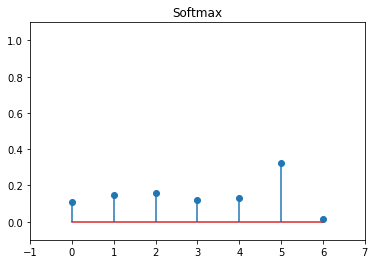

In [ ]:
def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)

y = softmax(x)
plt.ylim(-0.1,1.1)
plt.xlim(-1,7)
plt.title("Softmax")
plt.stem(y,use_line_collection=True)
plt.show()


#### Softmax Derivative
Generally for a unit to be useful as an activation function it must have a well defined derivative with respect to its input z. The derivative of softmax with respect to the logit is well defined and given by:

\begin{equation}
 \frac{\partial a_{i}}{\partial z_{j}} = a_{i} \; (\delta_{ij} - a_{j})
\end{equation}

Here $\frac{\partial a_{i}}{\partial z_{j}}$ is referred to as a Jacobian Matrix, i.e., a matrix of partial derivitives, while $\delta_{ij}$ is the Kronecker delta which is defined as:

\begin{equation}
\delta_{ij} =
    \begin{cases}
            1, &         \text{if } i=j,\\
            0, &         \text{if } i\neq j.
    \end{cases}
\end{equation}

The Jacobian thus has different forms along the diagonal and non-diagonal elements. Generally: 

\begin{equation}
 \frac{\partial a_{i}}{\partial z_{j}} = a_{i} \; (1 - a_{j})
\end{equation}

where $i=j$, and 

\begin{equation}
 \frac{\partial a_{i}}{\partial z_{i}} = - a_{i} a_{j}
\end{equation}

where $i\neq j$. 

Calculating this Jacobian is very possible and a number of implementations are available for it online. However it is important to note that we are only attempting to use the softmax layer in the output layer, and if we are using a Cross Entropy Loss Function in the output layer than it is not necessary to calculate $ \frac{\partial a_{i}}{\partial z_{i}}$ explicitly. Instead we simply calculate:

\begin{equation}
 \frac{\partial E}{\partial z_{i}} = y - a
\end{equation}

Therefore we can update our algorithm to account for softmax units in the final layer very easily. 


In [ ]:
# In this implementation we force all vectors to be true 2D arrays with 1 column rather than
# numpy 1D arrays. This makes it easier to use matirx operations. 

def celf_(y,a):
    if y == 1:
        return -np.log(a)
    elif y == 0:
        return -np.log(1-a)

celf = np.vectorize(celf_)

class Backpropogation: 
    
    def __init__(self,x,y,s,layers,cost="mse"):
        # set class references to X, Y, S and the activation function
        self.X = x
        self.Y = y
        self.S = s
        self.cost = cost
        if len(layers) == len(s) - 1:
            self.layers = ["None"] + layers
        else: 
            raise ValueError("len(layers) != len(s) - 1")
        # Define empty arrays for activation
        self.a     =  [None] * len(self.S)
        # Define empty array for z values (i.e., inputs) 
        self.z     =  [None] * len(self.S)
        # Define empty arrays for weights
        self.theta =  [None] * len(self.S)
        # Define empty array for error derivitives for indivual units
        self.delta =  [None] * len(self.S)
        # Define empty arrays for accumulated errors on weights
        self.Delta =  [None] * len(self.S)

        # Randomly Initialize the weights for all layers
        for idx, val in enumerate(self.S):
            if idx == (len(self.S)-1): # ouput layer has no weights
                break
            if layers[idx] == "tanh":
                self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1]) - 0.5
            elif layers[idx] == "logistic":
                self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1])
            elif layers[idx] == "relu":                
                self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1]) - 0.5
                self.theta[idx][0,:] = 0.0
            elif layers[idx] == "softmax":
                self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1])                
            else: 
                print("Error - unknown initialization for layer : " + layers[idx])

    # Calculate the cost
    def calcCost(self,a,y):
        if self.cost == "mse":
            return np.sum(np.multiply(0.5,(a-y)**2))
        elif self.cost == "celf":
            return np.sum(celf(y,a))
        else: print("Error - no cost function selected")
    
    # calculate the activation values given an input
    def calcActivation(self,z,activation):
        if activation == "logistic":
            return 1 / (1 + np.exp(-z))
        elif activation == "tanh":
            return np.tanh(z) # directly using numpy implementation 
        elif activation == "relu":
            return np.maximum(0,z)
        elif activation == "softmax":
            ex = np.exp(z)
            return ex / np.sum(ex)    
        else: print("Error - unknown activation function : " + str(activation))
        
    def calcGPrimeZ(self,a,activation):
        # Note that these implementations take advantage of the cached values for the activations 
        # of each layer. if we did not have this cached values we would have to use the longer form
        # functions of z, i.e., 
        # 1 / (1 + exp(-z))
        # 1 - tanh(z)**2
        if activation == "logistic":
            return np.multiply(a,(1 - a))
        elif activation == "tanh":
            return 1.0 - a**2
        elif activation == "relu":
            temp = np.zeros(a.shape)
            temp[a > 0] = 1
            return temp
        elif activation == "softmax":
            print("da/dz not implemented for softmax. Softmax only supported in output layer")
        else: print("Error - unknown activation function : " + str(activation)) 
            
    def forwardProp(self,x): 
        # Forward propogate activation 
        # For each layer from input to output
        for idx, val in enumerate(self.S):
            if idx == 0:
                # construct the activation values for the input layer from X and a bias value
                self.a[idx] = np.atleast_2d(np.hstack(([1.0],x))).T
            elif idx == (len(self.S)-1):
                # calculate z for the output layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate the activation values
                self.a[idx] = self.calcActivation(self.z[idx],self.layers[idx]) 
            else:
                # calculate z for a hidden layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate a for a hidden layer
                self.a[idx] = np.vstack(([1.0],self.calcActivation(self.z[idx],self.layers[idx])))
        # return the actual output values for the output layer 
        return self.a[len(self.S)-1]
    
    def predict(self,X):
        results = []
        for datum in X:
            results.append(self.forwardProp(datum))
        return np.squeeze(results)
            
    def backwardProp(self,y):
        # For each layer from output to input 
        for idx, val in reversed(list(enumerate(self.S))): 
            if idx == (len(self.S)-1):
                if self.cost == "mse":                  
                    # calculate ∂a/∂z for the output layer 
                    gprimez = self.calcGPrimeZ(self.a[idx],self.layers[idx])

                    # ∂E/∂zⱼ
                    self.delta[idx] = np.multiply(self.a[idx] - np.atleast_2d(y).T,gprimez)
                elif self.cost == "celf":
                    # ∂E/∂zⱼ
                    self.delta[idx] = -(np.atleast_2d(y).T - self.a[idx])
                else: print("Error - no cost function selected")  
            elif idx == 0:
                # we need to update the weights in the 0th layer but we don't propogate error
                # derivitive back to the input units. 
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T                
            else:
                # calculate the error for all other layers

                # 1. calculate the derivitive of g(z)
                gprimez = self.calcGPrimeZ(self.a[idx],self.layers[idx])

                # 2. calculate the error associatd with each node in the current layer. 
                self.delta[idx] = np.multiply(np.matmul(self.theta[idx],self.delta[idx+1]),gprimez)
                
                # get rid of the bias unit
                self.delta[idx] = self.delta[idx][1:,:]    

                # 3. update the accumulated change
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T

        return self.calcCost(self.a[len(self.S)-1],np.atleast_2d(y).T)

    def train(self,epochs):
        errors = []
        # For each training epoch 
        for k in range(epochs):
            error = 0
            # Initialize Delta for this epoch
            for idx, val in enumerate(self.S):
                if idx < (len(self.S)-1): # ouput layer has no weights
                    self.Delta[idx] = np.zeros((self.S[idx]+1,self.S[idx+1]))
            # Iterate over all training examples 
            for i, y in enumerate(self.Y):     
                self.forwardProp(self.X[i])
                error += self.backwardProp(y)
            errors.append(error)
            # For each layer from output to input 
            for idx, val in reversed(list(enumerate(self.S))): 
                if idx < (len(self.S)-1):
                    # Update the weights
                    self.theta[idx] = self.theta[idx] - (1/len(self.Y)) * self.Delta[idx] 
        return errors 

    def test(self): 
        for i, y in enumerate(self.Y):     
            output = self.forwardProp(self.X[i])
            print(self.X[i])
            print(y)
            print(output)
            print("Error is " + str(self.calcCost(output,np.atleast_2d(y).T)))
            print("---")

Time taken: 7.198967381000003


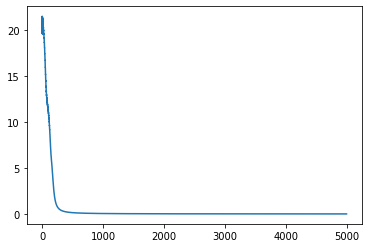

In [ ]:
# Define the data - r for red, g for green, and b for blue
Ys = ['b','b','r','b','g','r','g','r','g']
Yr = [1 if a =='r' else 0 for a in Ys]
Yg = [1 if a =='g' else 0 for a in Ys]
Yb = [1 if a =='b' else 0 for a in Ys]
X1 = [1,1,4,2,2,3,1,4,2]
X2 = [1,2,4,2,3,3,4,2,4]
X = np.vstack((X1,X2)).T
Y = np.vstack((Yr,Yg,Yb)).T

# standardize our input features
X, means, stds = standardize(X)

# Define the number of (visible) units in each layer 
# note that our output layer now has 3 units 
s = [2,8,8,3]    

start = time.perf_counter()    
# Instantiate the network with data and topology, before running training 
bp = Backpropogation(X,Y,s,cost="celf",layers=["logistic","logistic","softmax"])
errors = bp.train(5000)
print("Time taken: " + str(time.perf_counter() - start))

# Visualize Error over Epochs 
fig = plt.figure()
plt.plot(errors)
plt.show()

We can see that the number of iterations required before convergence to an error minimum is now considerably faster than was the case with the more basic approach to multi-class classification. By taking advantage of the extra knowledge that 1 and only 1 class should be active at a given time we managed to considerably speed up training. 

Time taken: 0.07854492700000293
Time taken: 0.07393823200000327


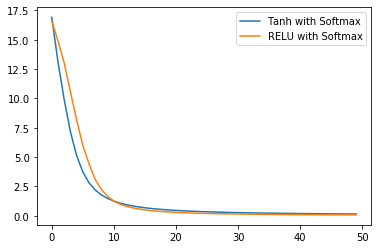

In [ ]:
# Define the data - r for red, g for green, and b for blue
Ys = ['b','b','r','b','g','r','g','r','g']
Yr = [1 if a =='r' else 0 for a in Ys]
Yg = [1 if a =='g' else 0 for a in Ys]
Yb = [1 if a =='b' else 0 for a in Ys]
X1 = [1,1,4,2,2,3,1,4,2]
X2 = [1,2,4,2,3,3,4,2,4]
X = np.vstack((X1,X2)).T
Y = np.vstack((Yr,Yg,Yb)).T

# standardize our input features
X, means, stds = standardize(X)

# Define the number of (visible) units in each layer 
# note that our output layer now has 3 units 
s = [2,8,8,3]    

start = time.perf_counter()    
# Instantiate the network with data and topology, before running training 
bp = Backpropogation(X,Y,s,cost="celf",layers=["tanh","tanh","softmax"])
errors1 = bp.train(50)
print("Time taken: " + str(time.perf_counter() - start))

start = time.perf_counter()    
# Instantiate the network with data and topology, before running training 
bp = Backpropogation(X,Y,s,cost="celf",layers=["relu","relu","softmax"])
errors2 = bp.train(50)
print("Time taken: " + str(time.perf_counter() - start))

# Visualize Error over Epochs 
fig = plt.figure()
plt.plot(errors1)
plt.plot(errors2)
plt.legend(['Tanh with Softmax', 'RELU with Softmax'], loc='upper right')
plt.show()

By combining softmax with Rectified Linear Units or Hyperbolic Tanget functions we achieve a significant overall speedup in our training time. Whereas our original multi-class logistic approach took some 1000 training epochs before convergence, this combination of efficient learners and an intuition about a multi-class classification problem has reduced the number of epochs required to get an acceptable rate of training to just 20 epochs. 

## The Easy Way
TensorFlow provides all the functionality we need to easily switch from logistic neurons to more useful neurons such as Rectified Linear Units or Hyperbolic Tan functions. 


In [ ]:
# import tensorflow library 
import tensorflow as tf 

# Get a copy of the mnist dataset container 
mnist = tf.keras.datasets.mnist 

# Pull out the training and test data 
(x_train, y_train),(x_test, y_test) = mnist.load_data() 

# Normalize the training and test datasets
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Create a simple sequential network object
model = tf.keras.models.Sequential()

# Add layers to the network for processing the input data 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Start the training process
model.fit(x=x_train, y=y_train, epochs=5) 

# Evaluate the model performance with test data
test_loss, test_acc = model.evaluate(x=x_test, y=y_test,verbose=0)

# Print out the model accuracy 
print('\nTest accuracy: ' + str(test_acc*100) + "%" )

11493376/11490434 [==============================] - 3s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2655 - accuracy: 0.9224
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1099 - accuracy: 0.9657
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0733 - accuracy: 0.9772
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0548 - accuracy: 0.9823
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0407 - accuracy: 0.9867

Test accuracy: 97.35999703407288%
